# Libraries

In [5]:

# Importing necessary libraries
import sqlite3 as db
import pandas as pds
from sklearn.cluster import KMeans as KM
import matplotlib.pyplot as plot
from mlxtend.preprocessing import TransactionEncoder as TE
from mlxtend.frequent_patterns import apriori, association_rules as arules
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings('ignore')

In [6]:
import sqlite3 as db
import pandas as pds
from sklearn.cluster import KMeans as KM
import matplotlib.pyplot as plot
from mlxtend.preprocessing import TransactionEncoder as TE
from mlxtend.frequent_patterns import apriori, association_rules as arules
import warnings

# Establishing a database connection
with db.connect('accident_data_v1.0.0_2023.db') as conn:
    # Cursor to execute queries
    cursor = conn.cursor()
    
    # Retrieve and display table names
    tables_query = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"
    table_names = cursor.execute(tables_query).fetchall()
    print("Table Names:", table_names)
    
    # Load 2020 accident data into DataFrame
    accidents_query_2020 = """
    SELECT * FROM accident
    WHERE accident_year = 2020;
    """
    df_accidents_2020 = pds.read_sql_query(accidents_query_2020, conn)
    print("2020 Accident Data")
    print(df_accidents_2020.head())
    print(df_accidents_2020.columns)  # Displaying columns of the 2020 accident data
    
    # Load 2020 casualty data into DataFrame
    casualty_query_2020 = """
    SELECT * FROM casualty
    WHERE accident_index IN (
        SELECT accident_index
        FROM accident
        WHERE accident_year = 2020
    );
    """
    df_casualty_2020 = pds.read_sql_query(casualty_query_2020, conn)
    print("2020 Casualty Data")
    print(df_casualty_2020.head())
    print(df_casualty_2020.columns)  # Displaying columns of the 2020 casualty data
    
    # Load 2020 vehicle data into DataFrame
    vehicle_query_2020 = """
    SELECT * FROM vehicle
    WHERE accident_index IN (
        SELECT accident_index
        FROM accident
        WHERE accident_year = 2020
    );
    """
    df_vehicle_2020 = pds.read_sql_query(vehicle_query_2020, conn)
    print("2020 Vehicle Data")
    print(df_vehicle_2020.head())
    print(df_vehicle_2020.columns)  # Displaying columns of the 2020 vehicle data
    
    # Load LSOA data into DataFrame (LSOA data is static and not dependent on year)
    lsoa_query = "SELECT * FROM lsoa;"
    df_lsoa = pds.read_sql_query(lsoa_query, conn)
    print("LSOA Data")
    print(df_lsoa.head())
    print(df_lsoa.columns)  # Displaying columns of the LSOA data
    

Table Names: [('accident',), ('casualty',), ('lsoa',), ('vehicle',)]
2020 Accident Data
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  \
0        

In [7]:
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [8]:
df_vehicle_2020

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


# Connecting to the Accident Database and Manipulating the Data

In [9]:
#

### Question1

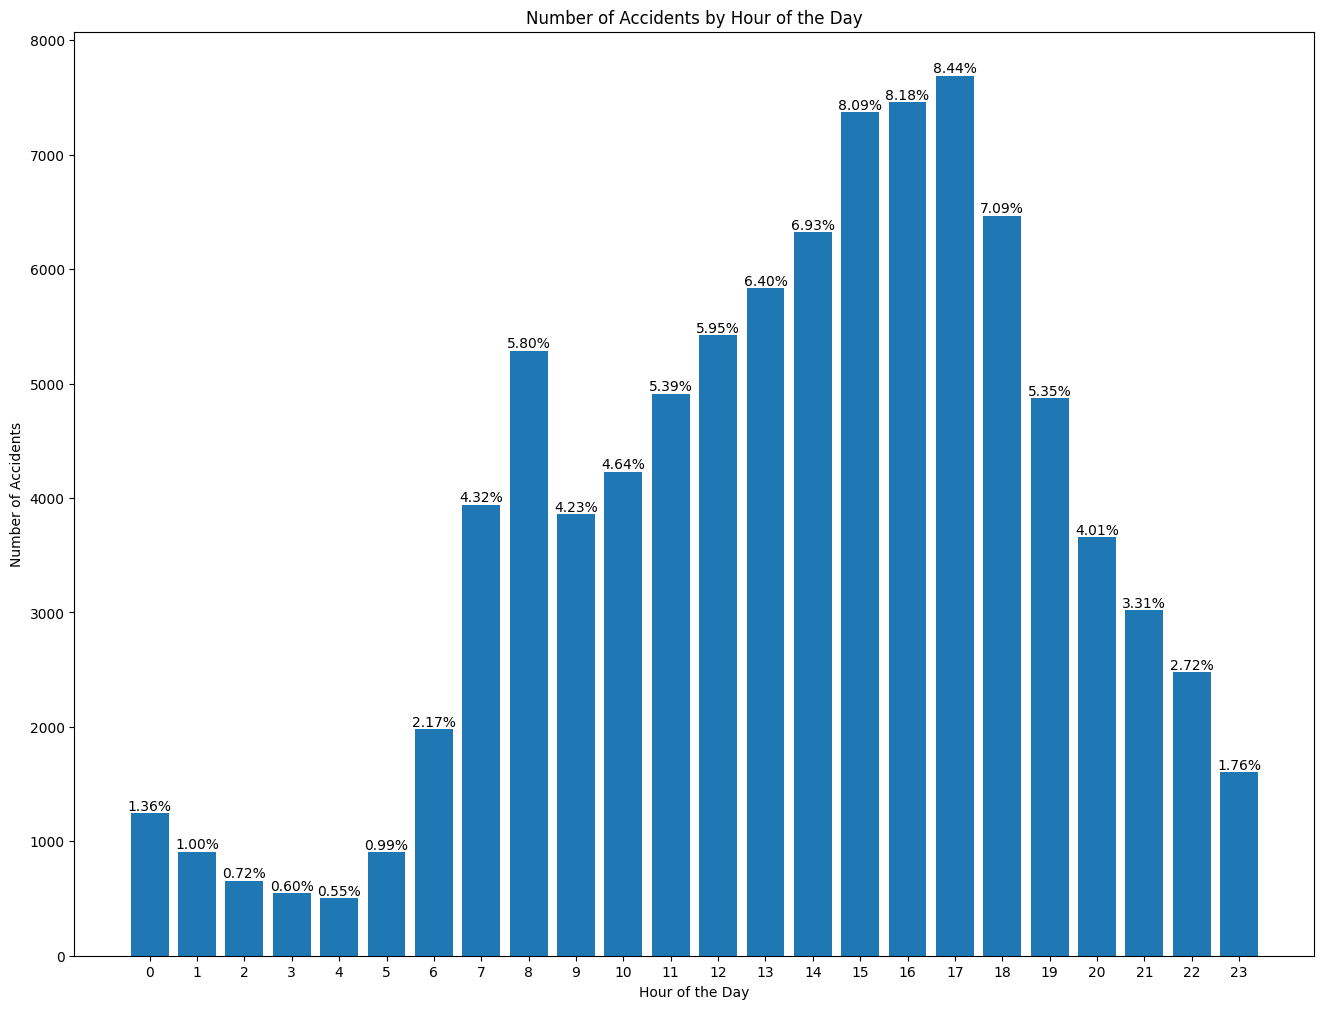

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Filter DeprecationWarning for np.find_common_type
warnings.filterwarnings("ignore", category=DeprecationWarning, message="np.find_common_type is deprecated")

# Assuming df_accidents_2020 is your DataFrame with 'time' column already converted to datetime
# Convert 'time' to datetime and extract decimal time
df_accidents_2020['converted_time'] = pd.to_datetime(df_accidents_2020['time'], format='%H:%M', errors='coerce')
df_accidents_2020['decimal_time'] = df_accidents_2020['converted_time'].dt.hour + df_accidents_2020['converted_time'].dt.minute / 60

# Get the count of occurrences for each unique value in the 'decimal_time' column
decimal_time_counts = df_accidents_2020['decimal_time'].value_counts()

decimal_time_counts_df = decimal_time_counts.reset_index()


decimal_time_counts_df.columns = ['decimal_time', 'count']

# Sort the DataFrame 
sorted_decimal_time_counts_df = decimal_time_counts_df.sort_values(by='decimal_time')


# Define the hour intervals
intervals = pd.interval_range(start=0, end=24, freq=1)

# Group 'decimal_time' into intervals
df_accidents_2020['hour_interval'] = pd.cut(df_accidents_2020['decimal_time'], bins=intervals)

# Count the occurrences of each interval
interval_counts = df_accidents_2020['hour_interval'].value_counts().sort_index()

# Plot the hourly distribution of accidents
plt.figure(figsize=(16, 12))
plt.bar(x=range(24), height=interval_counts.values)

# Set the custom labels for x-axis ticks
plt.xticks(range(24))

# Set the title and labels
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

# Calculate percentages and annotate each bar with its percentage
total_accidents = interval_counts.sum()
for index, value in enumerate(interval_counts):
    percentage = (value / total_accidents) * 100
    plt.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


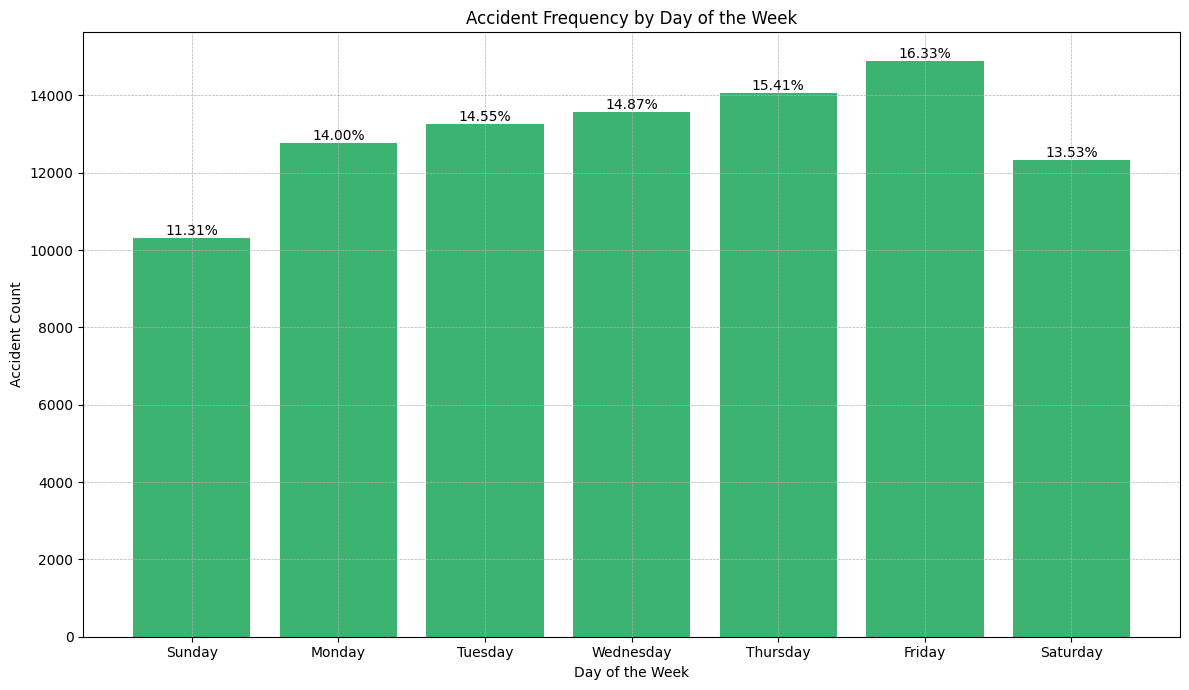

In [11]:
import matplotlib.pyplot as plt
import pandas as pd



weekly_distribution = df_accidents_2020['day_of_week'].value_counts().sort_index()

# Define the order of days of the week and corresponding labels
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the distribution of accidents by day of the week
plt.figure(figsize=(12, 7))
bars = plt.bar(day_labels, weekly_distribution, color='mediumseagreen')

# Add percentages on top of bars
total_accidents = weekly_distribution.sum()
for bar in bars:
    percentage = (bar.get_height() / total_accidents) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')

# Set ticks and labels for x-axis
plt.xticks(ticks=day_labels, labels=day_order, rotation=0)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [12]:
#

In [13]:
import pandas as pd

# Define the list of motorcycle types
motorcycle_types = [2, 3, 4, 5, 97]

# Filter for motorbike accidents based on the defined motorcycle types
motorbike_accidents_df = df_vehicle_2020[df_vehicle_2020['vehicle_type'].isin(motorcycle_types)].merge(df_accidents_2020, on='accident_index')

# Convert 'time' and 'date' columns to datetime to extract hour and day of the week
motorbike_accidents_df['accident_hour'] = pd.to_datetime(motorbike_accidents_df['time'], format='%H:%M', errors='coerce').dt.hour
motorbike_accidents_df['accident_day_of_week'] = pd.to_datetime(motorbike_accidents_df['date'], errors='coerce').dt.day_name()

# Display the DataFrame to verify the changes
print(motorbike_accidents_df.head())


   vehicle_index accident_index  accident_year_x accident_reference_x  \
0         681728  2020010228020             2020            010228020   
1         681748  2020010228077             2020            010228077   
2         681749  2020010228086             2020            010228086   
3         681752  2020010228097             2020            010228097   
4         681774  2020010228148             2020            010228148   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             3                        0   
1                  2             2                        0   
2                  1             3                        0   
3                  2             3                        0   
4                  1             3                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                  3                       7                     3  ...   
1                 18            

### Question 2

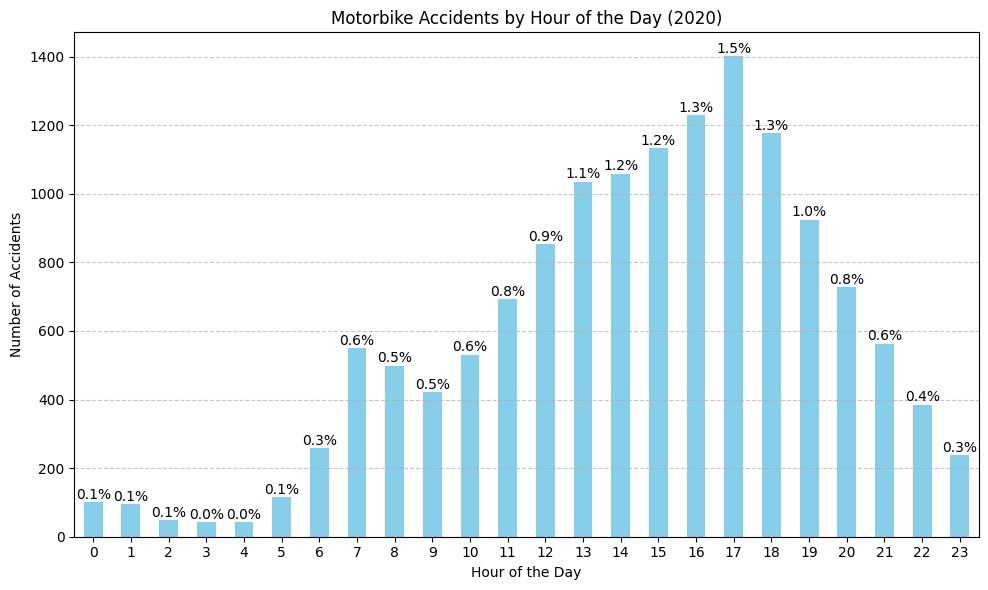

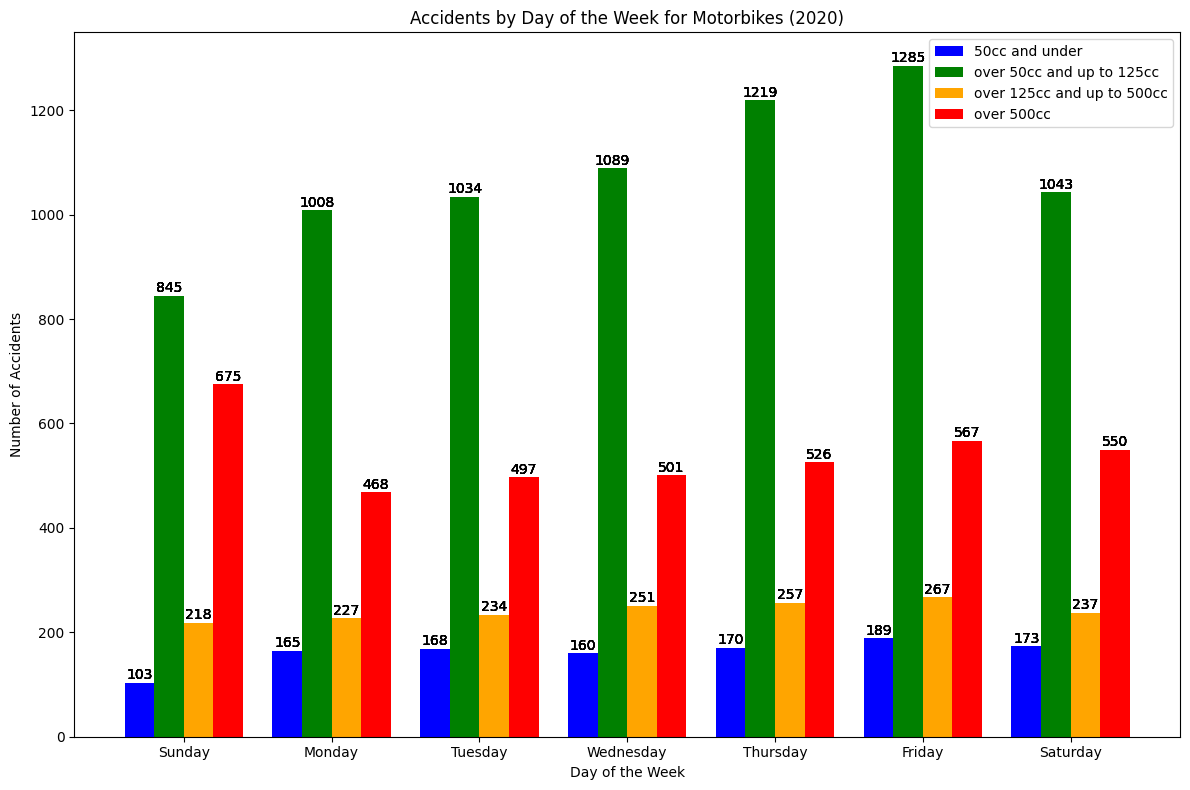

In [14]:


import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')

# Query accident table for accidents
accident_query = "SELECT * FROM accident"
accident_df = pd.read_sql_query(accident_query, conn)

# Filter accidents for the year 2020
accident_df['date'] = pd.to_datetime(accident_df['date'], format="%d/%m/%Y")
accident_df_2020 = accident_df[accident_df['date'].dt.year == 2020]

# Query vehicle table
vehicle_query = "SELECT * FROM vehicle"
vehicle_df = pd.read_sql_query(vehicle_query, conn)

# Merge accident and vehicle tables on accident_index
df_merge = pd.merge(accident_df_2020, vehicle_df, on='accident_index')

# Filter out rows where vehicle_type is 2, 3, 4, or 5 (motorcycles)
motorcycle_acc = df_merge.loc[df_merge['vehicle_type'].isin([2, 3, 4, 5])]

# Extract hour from the 'time' column of accident_motorcycles
motorcycle_acc['hour'] = pd.to_datetime(motorcycle_acc['time']).dt.hour

# Count the number of accidents for each hour
accidents_per_hour = motorcycle_acc['hour'].value_counts().sort_index()

# Calculate percentages
total_accident = accidents_per_hour.sum()
percentages = (accidents_per_hour / total_accidents) * 100

# Plotting accidents by hour of the day
plt.figure(figsize=(10, 6))
accidents_per_hour.plot(kind='bar', color='skyblue')
plt.title('Motorbike Accidents by Hour of the Day (2020)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

# Adding percentages on top of each bar
for i, value in enumerate(accidents_per_hour):
    plt.text(i, value + 1, f'{percentages[i]:.1f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group the filtered data 
grouped_df = motorcycle_acc.groupby(['day_of_week', 'vehicle_type']).size().unstack(fill_value=0)

# Define the day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot accidents by day of the week and vehicle type
plt.figure(figsize=(12, 8))

# Define the width of each bar
bar_width = 0.2

# Define colors for each vehicle type
colors = ['blue', 'green', 'orange', 'red']

# Define vehicle type labels
labels = {
    2: '50cc and under',
    3: 'over 50cc and up to 125cc',
    4: 'over 125cc and up to 500cc',
    5: 'over 500cc'
}

# Plot bars for each vehicle type
for j, vehicle_type in enumerate(grouped_df.columns):
    # Calculate the x position for the bars
    x = range(len(day_names))
    
    # Calculate the x position for each bar within the group
    x_adjusted = [pos + bar_width * j - 1.5 * bar_width for pos in x]
        
    # Plot the bars
    plt.bar(x_adjusted, grouped_df[vehicle_type], width=bar_width, label=f'{labels[vehicle_type]}', align='center', color=colors[j])

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week for Motorbikes (2020)')
plt.xticks(range(len(day_names)), day_names)
plt.tight_layout()

# Add number of accidents on top of the bars
for i, day in enumerate(day_names):
    x = range(len(day_names))
    for j, vehicle_type in enumerate(grouped_df.columns):
        x_adjusted = [pos + bar_width * j - 1.5 * bar_width for pos in x]
        counts = grouped_df[vehicle_type]
        for k, (pos, count) in enumerate(zip(x_adjusted, counts)):
            plt.text(pos, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Add legend
plt.legend()

plt.show()


### Question 3

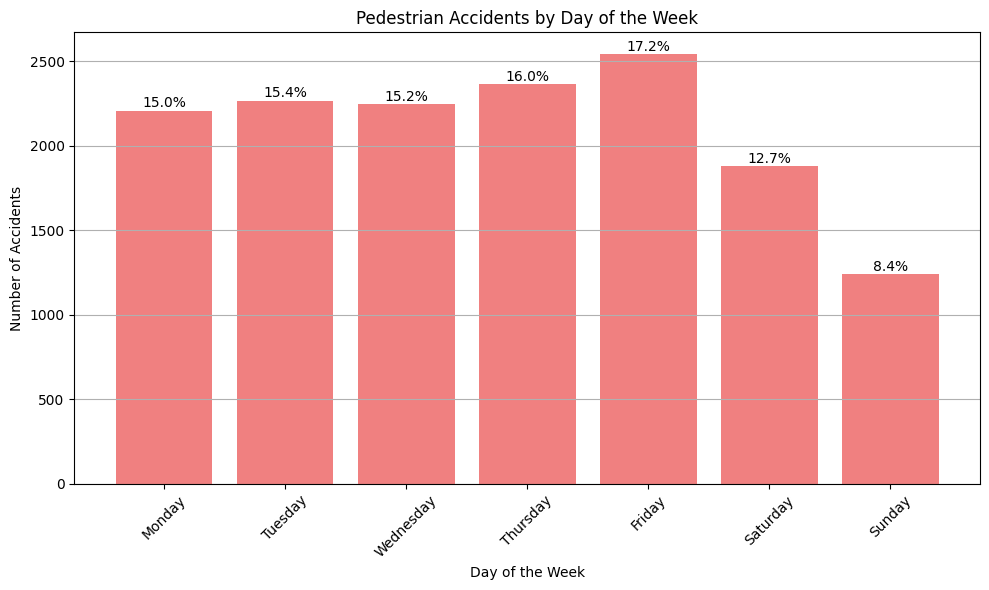

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')

# Query accident table for accidents
accident_query = "SELECT * FROM accident"
accident_df = pd.read_sql_query(accident_query, conn)

# Filter accidents for the year 2020
accident_df['date'] = pd.to_datetime(accident_df['date'], format="%d/%m/%Y")
accident_df_2020 = accident_df[accident_df['date'].dt.year == 2020]

# Query casualty table for casualties
casualty_query = "SELECT * FROM casualty"
casualty_df = pd.read_sql_query(casualty_query, conn)

# Filter for pedestrian casualties
pedestrian_df = casualty_df[casualty_df['casualty_class'] == 3]

# Merge accident and casualty tables on accident_index
pedestrian_accidents_df = pd.merge(accident_df_2020, pedestrian_df, on='accident_index')

# Convert 'time' and 'date' columns to datetime to extract the hour and day of the week
pedestrian_accidents_df['accident_hour'] = pd.to_datetime(pedestrian_accidents_df['time'], errors='coerce').dt.hour
pedestrian_accidents_df['accident_day_of_week'] = pd.to_datetime(pedestrian_accidents_df['date'], errors='coerce').dt.day_name()

# Grouping by day of the week to count occurrences
weekly_pedestrian_distribution = pedestrian_accidents_df['accident_day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Calculate percentages
total_accidents = weekly_pedestrian_distribution.sum()
weekly_percentages = (weekly_pedestrian_distribution / total_accidents) * 100

# Plotting weekly distribution of pedestrian accidents
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_percentages.index, weekly_pedestrian_distribution, color='lightcoral')

# Adding percentages on top of each bar
for bar, percentage in zip(bars, weekly_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Pedestrian Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


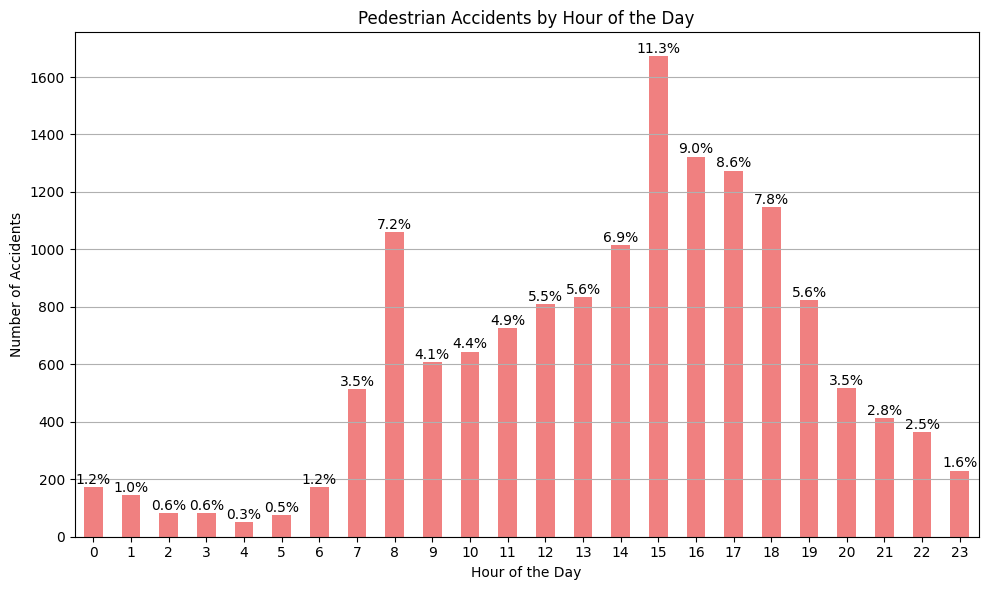

In [16]:
# Filter for pedestrian accidents from the casualty DataFrame
pedestrian_df = df_casualty_2020[df_casualty_2020['casualty_class'] == 3]

# Merge the filtered pedestrian data with the accident DataFrame
pedestrian_accidents_df = pd.merge(accident_df_2020, pedestrian_df, on='accident_index')

# Convert 'time' and 'date' columns to datetime to extract the hour and day of the week
pedestrian_accidents_df['accident_hour'] = pd.to_datetime(pedestrian_accidents_df['time'], format='%H:%M', errors='coerce').dt.hour
pedestrian_accidents_df['accident_day_of_week'] = pd.to_datetime(pedestrian_accidents_df['date'], errors='coerce').dt.day_name()

# Grouping by hour to count occurrences of pedestrian accidents
hourly_pedestrian_distribution = pedestrian_accidents_df.groupby('accident_hour').size()

# Calculate total accidents
total_accidents = hourly_pedestrian_distribution.sum()

# Plotting hourly distribution of pedestrian accidents
plt.figure(figsize=(10, 6))
bars = hourly_pedestrian_distribution.plot(kind='bar', color='lightcoral')
plt.title('Pedestrian Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding percentages on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height/total_accidents:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Question 4

## Apriori algorithm

In [17]:
import numpy as np


# Replace '-' with NaN
accident_df_2020.replace('-', np.nan, inplace=True)

# Convert columns to appropriate data types if needed
accident_df_2020['date'] = pd.to_datetime(accident_df_2020['date'], errors='coerce')

# Replace NaN with median (numeric columns)
numeric_cols = accident_df_2020.select_dtypes(include=np.number).columns
accident_df_2020[numeric_cols] = accident_df_2020[numeric_cols].fillna(accident_df_2020[numeric_cols].median())

# Display the cleaned DataFrame
print(accident_df_2020)

       accident_index  accident_year accident_reference  \
370153  2020010219808           2020          010219808   
370154  2020010220496           2020          010220496   
370155  2020010228005           2020          010228005   
370156  2020010228006           2020          010228006   
370157  2020010228011           2020          010228011   
...               ...            ...                ...   
461347  2020991027064           2020          991027064   
461348  2020991029573           2020          991029573   
461349  2020991030297           2020          991030297   
461350  2020991030900           2020          991030900   
461351  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
370153               521389.0                175144.0  -0.254001  51.462262   
370154               529337.0                176237.0  -0.139253  51.470327   
370155               526432.0                182761.0 

In [18]:
accident_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91199 entries, 370153 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91199 non-null  float64       
 4   location_northing_osgr                       91199 non-null  float64       
 5   longitude                                    91199 non-null  float64       
 6   latitude                                     91199 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64    

In [19]:
# Replace '-' with NaN
df_vehicle_2020.replace('-', np.nan, inplace=True)

# Convert columns 
df_vehicle_2020['accident_year'] = pd.to_numeric(df_vehicle_2020['accident_year'], errors='coerce')

# Replace NaN with median (numeric columns)
numeric_cols = df_vehicle_2020.select_dtypes(include=np.number).columns
df_vehicle_2020[numeric_cols] = df_vehicle_2020[numeric_cols].fillna(df_vehicle_2020[numeric_cols].median())

# Display the cleaned DataFrame
print(df_vehicle_2020)

        vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9    

In [20]:
df_casualty_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [21]:
# Replace '-' with NaN
df_casualty_2020.replace('-', np.nan, inplace=True)



# Replace NaN with median (numeric columns) or mode (categorical columns)
numeric_cols = df_casualty_2020.select_dtypes(include=np.number).columns
categorical_cols = df_casualty_2020.select_dtypes(include='object').columns

df_casualty_2020[numeric_cols] = df_casualty_2020[numeric_cols].fillna(df_casualty_2020[numeric_cols].median())
df_casualty_2020[categorical_cols] = df_casualty_2020[categorical_cols].fillna(df_casualty_2020[categorical_cols].mode().iloc[0])

# Display the cleaned DataFrame
print(df_casualty_2020)

        casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1         

In [22]:

merged_df = accident_df_2020.merge(df_vehicle_2020, on="accident_index") \
               .merge(df_casualty_2020, on="accident_index") \
               .merge(df_lsoa, left_on="lsoa_of_accident_location", right_on="lsoa01cd")


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 88 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               201943 non-null  object        
 1   accident_year_x                              201943 non-null  int64         
 2   accident_reference_x                         201943 non-null  object        
 3   location_easting_osgr                        201943 non-null  float64       
 4   location_northing_osgr                       201943 non-null  float64       
 5   longitude                                    201943 non-null  float64       
 6   latitude                                     201943 non-null  float64       
 7   police_force                                 201943 non-null  int64         
 8   accident_severity                            201943 non-null  in

In [24]:

df_select = merged_df[["accident_severity", "speed_limit", "weather_conditions", "light_conditions", 
                       "urban_or_rural_area", "road_type"]]


df_select.loc[~(df_select == -1).any(axis=1)]

,accident_severity,speed_limit,weather_conditions,light_conditions,urban_or_rural_area,road_type
0,3,20,9,1,1,6
1,2,30,1,1,1,6
2,2,30,1,1,1,6
3,3,60,1,1,1,6
4,3,60,1,1,1,6
...,...,...,...,...,...,...
201938,2,60,2,6,2,6
201939,2,60,2,6,2,6
201940,2,60,2,6,2,6
201941,2,30,2,5,1,6


In [25]:

df_select_aprori= pd.get_dummies(df_select, columns= df_select.columns) 

In [26]:
#aprori computation

apriori_frq = apriori(df_select_aprori, min_support=0.3, use_colnames=True)
apriori_frq["length"] = apriori_frq["itemsets"].apply(lambda x: len(x))

In [27]:
apriori_frq

,support,itemsets,length
0,0.782676,(accident_severity_3),1
1,0.543693,(speed_limit_30),1
2,0.781666,(weather_conditions_1),1
3,0.711854,(light_conditions_1),1
4,0.639418,(urban_or_rural_area_1),1
5,0.360582,(urban_or_rural_area_2),1
6,0.721213,(road_type_6),1
7,0.441823,"(speed_limit_30, accident_severity_3)",2
8,0.608701,"(weather_conditions_1, accident_severity_3)",2
9,0.563253,"(light_conditions_1, accident_severity_3)",2


In [28]:

# Import necessary libraries

from mlxtend.frequent_patterns import apriori, association_rules


#generate association rules
ass_rul = association_rules(apriori_frq, metric="confidence", min_threshold=0.5)

ass_rul

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_limit_30),(accident_severity_3),0.543693,0.782676,0.441823,0.812633,1.038274,0.016287,1.159880,0.080786
1,(accident_severity_3),(speed_limit_30),0.782676,0.543693,0.441823,0.564502,1.038274,0.016287,1.047783,0.169624
2,(weather_conditions_1),(accident_severity_3),0.781666,0.782676,0.608701,0.778723,0.994949,-0.003090,0.982135,-0.022723
3,(accident_severity_3),(weather_conditions_1),0.782676,0.781666,0.608701,0.777718,0.994949,-0.003090,0.982238,-0.022826
4,(light_conditions_1),(accident_severity_3),0.711854,0.782676,0.563253,0.791248,1.010951,0.006101,1.041059,0.037594
...,...,...,...,...,...,...,...,...,...,...
164,"(weather_conditions_1, road_type_6)","(accident_severity_3, urban_or_rural_area_1)",0.571820,0.525718,0.300763,0.525975,1.000490,0.000147,1.000544,0.001144
165,"(weather_conditions_1, urban_or_rural_area_1)","(accident_severity_3, road_type_6)",0.500750,0.553592,0.300763,0.600625,1.084960,0.023552,1.117767,0.156849
166,"(accident_severity_3, road_type_6)","(weather_conditions_1, urban_or_rural_area_1)",0.553592,0.500750,0.300763,0.543294,1.084960,0.023552,1.093153,0.175416
167,"(accident_severity_3, urban_or_rural_area_1)","(weather_conditions_1, road_type_6)",0.525718,0.571820,0.300763,0.572100,1.000490,0.000147,1.000655,0.001033


In [29]:
lift_rul = association_rules(apriori_frq, metric="lift", min_threshold=1.0)

lift_rul

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_limit_30),(accident_severity_3),0.543693,0.782676,0.441823,0.812633,1.038274,0.016287,1.159880,0.080786
1,(accident_severity_3),(speed_limit_30),0.782676,0.543693,0.441823,0.564502,1.038274,0.016287,1.047783,0.169624
2,(light_conditions_1),(accident_severity_3),0.711854,0.782676,0.563253,0.791248,1.010951,0.006101,1.041059,0.037594
3,(accident_severity_3),(light_conditions_1),0.782676,0.711854,0.563253,0.719650,1.010951,0.006101,1.027807,0.049845
4,(accident_severity_3),(urban_or_rural_area_1),0.782676,0.639418,0.525718,0.671692,1.050474,0.025260,1.098305,0.221095
...,...,...,...,...,...,...,...,...,...,...
169,"(road_type_6, urban_or_rural_area_1)","(weather_conditions_1, accident_severity_3)",0.467711,0.608701,0.300763,0.643053,1.056434,0.016067,1.096237,0.100358
170,(weather_conditions_1),"(accident_severity_3, road_type_6, urban_or_ru...",0.781666,0.379246,0.300763,0.384772,1.014572,0.004320,1.008982,0.065781
171,(accident_severity_3),"(weather_conditions_1, road_type_6, urban_or_r...",0.782676,0.372452,0.300763,0.384275,1.031745,0.009254,1.019203,0.141579
172,(road_type_6),"(weather_conditions_1, accident_severity_3, ur...",0.721213,0.409809,0.300763,0.417024,1.017606,0.005204,1.012376,0.062059


In [30]:
#accident severity 


acc= lift_rul[(lift_rul ["consequents"]=={"accident_severity_3"})] 
acc= acc.sort_values(by="lift", ascending=False)


In [31]:
acc[["antecedents", "consequents", "support", "confidence", "lift"]].round(4)

,antecedents,consequents,support,confidence,lift
59,"(light_conditions_1, urban_or_rural_area_1)",(accident_severity_3),0.3716,0.8319,1.0629
137,"(weather_conditions_1, light_conditions_1, urb...",(accident_severity_3),0.3044,0.8277,1.0575
28,"(speed_limit_30, light_conditions_1)",(accident_severity_3),0.3182,0.8227,1.0511
5,(urban_or_rural_area_1),(accident_severity_3),0.5257,0.8222,1.0505
35,"(speed_limit_30, urban_or_rural_area_1)",(accident_severity_3),0.3789,0.8186,1.0459
53,"(weather_conditions_1, urban_or_rural_area_1)",(accident_severity_3),0.4098,0.8184,1.0456
0,(speed_limit_30),(accident_severity_3),0.4418,0.8126,1.0383
66,"(road_type_6, urban_or_rural_area_1)",(accident_severity_3),0.3792,0.8109,1.0360
22,"(weather_conditions_1, speed_limit_30)",(accident_severity_3),0.3475,0.8090,1.0336
162,"(weather_conditions_1, road_type_6, urban_or_r...",(accident_severity_3),0.3008,0.8075,1.0317


### Detecting Outlier

### Question 6

In [32]:
import sqlite3  # Import the sqlite3 library
import pandas as pd  # Import pandas library

# Establishing a database connection
with sqlite3.connect('accident_data_v1.0.0_2023.db') as conn:
    # Cursor to execute queries
    cursor = conn.cursor()
    
    # Retrieve and display table names
    tables_query = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"
    table_names = cursor.execute(tables_query).fetchall()
    print("Table Names:", table_names)
    
    # Load 2020 accident data into DataFrame
    accidents_query_2020 = """
    SELECT * FROM accident
    WHERE accident_year = 2020;
    """
    df_accidents_2020 = pd.read_sql_query(accidents_query_2020, conn)
    print("2020 Accident Data")
    print(df_accidents_2020.head())
    print(df_accidents_2020.columns)  # Displaying columns of the 2020 accident data

    # Close the cursor
    cursor.close()


Table Names: [('accident',), ('casualty',), ('lsoa',), ('vehicle',)]
2020 Accident Data
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  \
0        

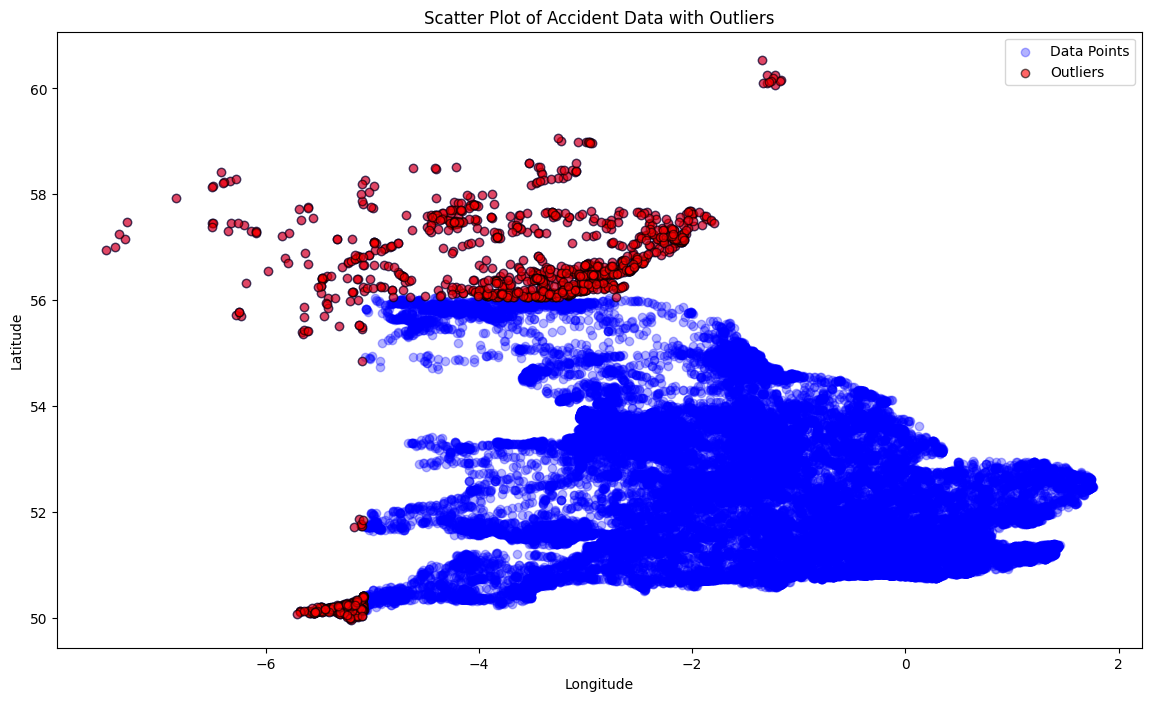

In [33]:
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the 'latitude' and 'longitude' columns
latitude_outliers = detect_outliers_iqr(df_accidents_2020, 'latitude')
longitude_outliers = detect_outliers_iqr(df_accidents_2020, 'longitude')

# Combine outliers
outliers = pd.concat([latitude_outliers, longitude_outliers]).drop_duplicates()

# Plot all data points
plt.figure(figsize=(14, 8))
plt.scatter(df_accidents_2020['longitude'], df_accidents_2020['latitude'], color='blue', label='Data Points', alpha=0.3)

# Highlight outliers
plt.scatter(outliers['longitude'], outliers['latitude'], color='red', label='Outliers', edgecolor='k', alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accident Data with Outliers')
plt.legend()
plt.show()


### Clustering

In [34]:

from sklearn.cluster import KMeans

In [35]:

df_m= merged_df.loc[(merged_df["police_force"] == 16 )]


In [36]:

# Remove rows containing special character '-'
df_m = df_m[~df_m.isin(['-']).any(axis=1)]

df_m.reset_index(drop=True, inplace=True)

In [37]:

cluster = df_m[["longitude", "latitude"]].to_numpy()

cluster

array([[-0.393424, 53.744936],
       [-0.393424, 53.744936],
       [-0.400627, 53.74452 ],
       ...,
       [-0.408728, 53.843568],
       [-0.428826, 53.743858],
       [-0.428826, 53.743858]])

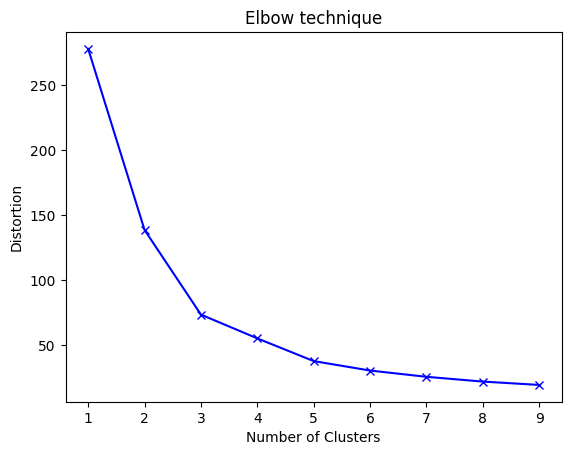

In [38]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K = range(1, 10)
distort = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(cluster).inertia_ for k in K]

plt.plot(K, distort, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow technique")
plt.show()

In [39]:
#

In [40]:
## Using n = 5
Clust = KMeans(n_clusters=5, random_state=42)
labels = Clust.fit_predict(cluster)  

# getting cluster centers after fitting the model
centroids = Clust.cluster_centers_

print(labels)
print(centroids)




[1 1 1 ... 1 1 1]
[[-0.64480708 53.58344785]
 [-0.36209989 53.75934013]
 [-0.08914657 53.57574388]
 [-0.81096243 53.81133825]
 [-0.27015856 54.03855049]]


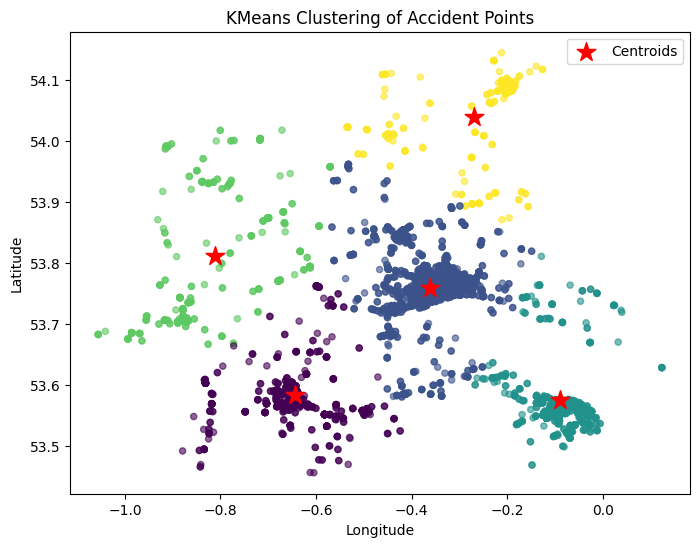

In [41]:
import matplotlib.pyplot as plt

# Create plot of the cluster points
plt.figure(figsize=(8, 6))
plt.scatter(cluster[:, 0], cluster[:, 1], c=labels, cmap='viridis', s=20, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', s=200, label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of Accident Points')
plt.legend()
plt.grid(False)
plt.show()

In [42]:
#

In [43]:
import folium
from sklearn.cluster import KMeans
import numpy as np

labels = np.array([1, 1, 1, 1, 1])  
centroids = np.array([
    [-0.64480708, 53.58344785],
    [-0.36209989, 53.75934013],
    [-0.08914657, 53.57574388],
    [-0.81096243, 53.81133825],
    [-0.27015856, 54.03855049]
])

# Create a Folium map centered around the mean latitude and longitude of centroids
center_lat, center_lng = centroids[:, 1].mean(), centroids[:, 0].mean()
accident_map = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# Define colors for clusters
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed

accident_points = [
    [-0.64480708, 53.58344785],
    [-0.36209989, 53.75934013],
    [-0.08914657, 53.57574388],
    [-0.81096243, 53.81133825],
    [-0.27015856, 54.03855049]
]

# Add markers for the data points representing the clusters
for i, point in enumerate(accident_points):
    folium.CircleMarker(
        location=[point[1], point[0]],  # latitude, longitude format
        radius=5,
        color=cluster_colors[labels[i]],
        fill_color=cluster_colors[labels[i]],
    ).add_to(accident_map)

# Add the centroids to the map
for centroid in centroids:
    folium.Marker(
        location=[centroid[1], centroid[0]],  # latitude, longitude format
        icon=folium.Icon(color="red", icon="star")
    ).add_to(accident_map)

# Display the map
accident_map




## Question 7

In [44]:
col_columns = df_merge.select_dtypes(include=['object']).columns

In [45]:
df_merge = df_merge.drop(columns=col_columns)


In [46]:
import pandas as pd

# Function to convert values to boolean
def convert_to_bool(value):
    return value == 1

# Apply the function to the 'accident_severity' column
df_merge['accident_severity'] = df_merge['accident_severity'].apply(convert_to_bool)

# Checking the unique values in 'accident_severity'
print(df_merge['accident_severity'].unique())


[False  True]


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Preprocessing the dataset
X = df_merge.drop("accident_severity", axis=1)
y = df_merge["accident_severity"]


rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X, y)

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=3)

# Ensure that X_test has the same columns as X_train
X_test = X_test[X_train.columns]


In [48]:
# Convert datetime features to numeric features and remove NaN values
def preprocess_data(df):
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col + '_year'] = df[col].dt.year
            df[col + '_month'] = df[col].dt.month
            df[col + '_day'] = df[col].dt.day
            df[col + '_hour'] = df[col].dt.hour
            df.drop(col, axis=1, inplace=True)
    df.dropna(inplace=True)
    return df


In [49]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler


# Define the evaluate_model function
def evaluate_model(model, X, y):
    """
    Evaluate a model
    """
    # Do cross verification
    cv = RepeatedStratifiedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    
    # Get scores
    scores = cross_val_score(
        model, X, y,
        scoring="accuracy",
        cv=cv,
        error_score='raise'
    )
    
    return scores

# Define the get_stacking function
def get_stacking():
    """
    Create a stacking classifier
    """
    level0 = []
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Assuming df_merge is your dataset and the target variable is "accident_severity"

# Preprocessing the dataset
df_merge = preprocess_data(df_merge)

X = df_merge.drop("accident_severity", axis=1)
y = df_merge["accident_severity"]

# Performing random undersampling
X_balanced, y_balanced = RandomUnderSampler().fit_resample(X, y)

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=3)

# Ensure that X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Define base models
base_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate and print accuracy for each base model
for name, model in base_models.items():
    scores = evaluate_model(model, X_train, y_train)
    print(f'{name} Accuracy: {np.mean(scores):.3f} ({np.std(scores):.3f})')

# Get the stacking model
stacking_model = get_stacking()

# Evaluate the stacking model
stacking_scores = evaluate_model(stacking_model, X_train, y_train)
print(f'Stacking Model Accuracy: {np.mean(stacking_scores):.3f} ({np.std(stacking_scores):.3f})')

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.3f}')


Decision Tree Accuracy: 0.687 (0.021)
K-Neighbors Accuracy: 0.646 (0.019)
Naive Bayes Accuracy: 0.547 (0.010)
Stacking Model Accuracy: 0.699 (0.023)
Confusion Matrix:
[[327 143]
 [162 341]]
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.70      0.68       470
        True       0.70      0.68      0.69       503

    accuracy                           0.69       973
   macro avg       0.69      0.69      0.69       973
weighted avg       0.69      0.69      0.69       973

Test Accuracy: 0.687


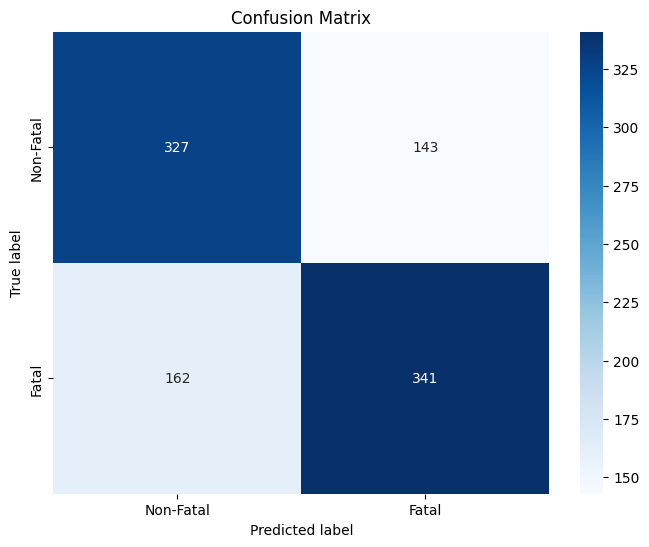

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)  # Replace y_true and y_pred with actual values
classes = ['Non-Fatal', 'Fatal']  # Replace with your actual class labels

def plot_confusion_matrix_seaborn(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


plot_confusion_matrix_seaborn(conf_matrix, classes=classes)


In [ ]:
#